# 데이터 표현과 특성 공학

- 특성공학 : 가장 적합한 데이터 표현을 찾는 것.

#### 4.1 범주형 변수

- 원-핫-인코딩 : 범주형 변수를 표현하는데 널리 쓰이는 방법

#### 4.1.1 원-핫-인코딩(가변수)

In [29]:
import sys
reload(sys)
sys.setdefaultencoding('utf-8')

In [30]:
import os
import pandas as pd
import mglearn
# 이 파일은 열 이름을 나타내는 헤더가 없으므로 header=None으로 지정하고
# "names" 매개변수로 열 이름을 제공합니다
data = pd.read_csv(
    os.path.join(mglearn.datasets.DATA_PATH, "adult.data"), header=None, index_col=False,
    names=['age', 'workclass', 'fnlwgt', 'education',  'education-num',
           'marital-status', 'occupation', 'relationship', 'race', 'gender',
           'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
           'income'])
# 예제를 위해 몇개의 열만 선택합니다
data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week',
             'occupation', 'income']]
# IPython.display 함수는 주피터 노트북을 위해 포맷팅된 출력을 만듭니다
display(data.head())

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [31]:
#예를들어 남성이 male, man으로 사용될 수 있으므로 같은 범주로 인식해야 한다. Series에 있는 value_counts 메서드를 사용하여 유일한 삾이 몇번 나타나는지 확인해 보는것이 좋다.
print(data.gender.value_counts())

In [32]:
#data_dummies를 이용하여 원핫인코딩을 진행할 수 있다.
print("원본 특성:\n", list(data.columns), "\n")
data_dummies = pd.get_dummies(data)
print("get_dummies 후의 특성:\n", list(data_dummies.columns))

In [33]:
display(data_dummies.head())

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,38,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,53,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,40,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [34]:
features = data_dummies.loc[:, 'age':'occupation_ Transport-moving']
# NumPy 배열 추출
X = features.values
y = data_dummies['income_ >50K'].values
print("X.shape: {}  y.shape: {}".format(X.shape, y.shape))

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)
print("테스트 점수: {:.2f}".format(logreg.score(X_test, y_test)))

각각 Test,Train DataFrame을 원핫인코딩한다면, 두개의 범주가 서로 다르게 나타날 수 있기 떄문에 위험하다.
그래서 두개의 DataFrame을 가지고 원핫인코딩을 진행하던가 각각 진행한디 열 이름을 비교해서 같은 속성인지 확인해야한다.

#### 4.1.2 숫자로 표현된 범주현 특성

In [36]:
# 숫자 특성과 범주형 문자열 특성을 가진 DataFrame을 만듭니다
demo_df = pd.DataFrame({'숫자 특성': [0, 1, 2, 1],
                        '범주형 특성': ['양말', '여우', '양말', '상자']})
display(demo_df)

,범주형 특성,숫자 특성
0,양말,0
1,여우,1
2,양말,2
3,상자,1


In [37]:
display(pd.get_dummies(demo_df))

,숫자 특성,범주형 특성_상자,범주형 특성_양말,범주형 특성_여우
0,0,0,1,0
1,1,0,0,1
2,2,0,1,0
3,1,1,0,0


In [38]:
demo_df['숫자 특성'] = demo_df['숫자 특성'].astype(str)
display(pd.get_dummies(demo_df, columns=['숫자 특성', '범주형 특성']))

,숫자 특성_0,숫자 특성_1,숫자 특성_2,범주형 특성_상자,범주형 특성_양말,범주형 특성_여우
0,1,0,0,0,1,0
1,0,1,0,0,0,1
2,0,0,1,0,1,0
3,0,1,0,1,0,0


숫자로 표현된 범주형 특성을 인코딩하려면 명시해줘야 한다.

#### 4.2 OneHotEncoder와 ColumnTransformer:scikit-learn으로 범주형 변수 다루기

In [39]:
from sklearn.preprocessing import OneHotEncoder
# sparse=False로 설정하면 OneHotEncode가 희소 행렬이 아니라 넘파이 배열을 반환합니다
ohe = OneHotEncoder(sparse=False)
print(ohe.fit_transform(demo_df))

In [40]:
print(ohe.get_feature_names())

In [41]:
display(data.head())

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [42]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

ct = ColumnTransformer(
    [("scaling", StandardScaler(), ['age', 'hours-per-week']),
     ("onehot", OneHotEncoder(sparse=False), ['workclass', 'education', 'gender', 'occupation'])])
#### 연속성 변수가 왜 스케일 조정이 필요한지

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# income을 제외한 모든 열을 추출합니다
data_features = data.drop("income", axis=1)
# 데이터프레임과 income을 분할합니다
X_train, X_test, y_train, y_test = train_test_split(
    data_features, data.income, random_state=0)

ct.fit(X_train)
X_train_trans = ct.transform(X_train)
print(X_train_trans.shape)

In [44]:
logreg = LogisticRegression()
logreg.fit(X_train_trans, y_train)

X_test_trans = ct.transform(X_test)
print("테스트 점수: {:.2f}".format(logreg.score(X_test_trans, y_test)))

In [45]:
ct.named_transformers_.onehot

OneHotEncoder(categorical_features=None, categories=None,
       dtype=<type 'numpy.float64'>, handle_unknown='error', n_values=None,
       sparse=False)

#### 4.3 make_column_transformer로 간편하게 ColumnTransformer 만들기

In [46]:
from sklearn.compose import make_column_transformer
ct = make_column_transformer(
    (StandardScaler(), ['age', 'hours-per-week']),
    (OneHotEncoder(sparse=False), ['workclass', 'education', 'gender', 'occupation']))

자동으로 각 단계에 이름을 붙여주는 함수

#### 4.4 구간 분할, 이산화 그리고 선형 모델, 트리 모델

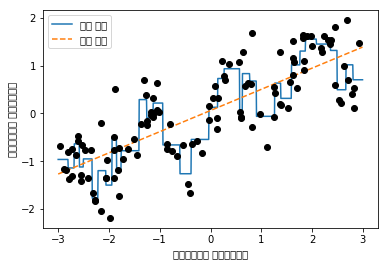

In [47]:
import numpy as np
import matplotlib.pylab as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

X, y = mglearn.datasets.make_wave(n_samples=120)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

reg = DecisionTreeRegressor(min_samples_leaf=3).fit(X, y)
plt.plot(line, reg.predict(line), label="결정 트리")

reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), '--', label="선형 회귀")

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.legend(loc="best")

연속형 데이터에 강력한 선형 모델을 만드는 방법 하나는 한 특성을 여러 특성으로 나누는 구간분할 이다.(이산화)

In [48]:
#구간을 분리하는데 사용되는 클래스
from sklearn.preprocessing import KBinsDiscretizer

In [49]:
kb = KBinsDiscretizer(n_bins=10, strategy='uniform')
kb.fit(X)
print("bin edges: \n", kb.bin_edges_)

In [50]:
kb.bin_edges_

array([array([-2.9668673 , -2.37804841, -1.78922951, -1.20041062, -0.61159173,
       -0.02277284,  0.56604605,  1.15486494,  1.74368384,  2.33250273,
        2.92132162])], dtype=object)

In [51]:
print("bin edges: \n", kb.bin_edges_)

In [52]:
X_binned = kb.transform(X)
X_binned

<120x10 sparse matrix of type '<type 'numpy.float64'>'
	with 120 stored elements in Compressed Sparse Row format>

In [53]:
print(X[:10])
X_binned.toarray()[:10]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

In [54]:
kb = KBinsDiscretizer(n_bins=10, strategy='uniform', encode='onehot-dense')
kb.fit(X)
X_binned = kb.transform(X)

Text(0.5,0,'\xec\x9e\x85\xeb\xa0\xa5 \xed\x8a\xb9\xec\x84\xb1')

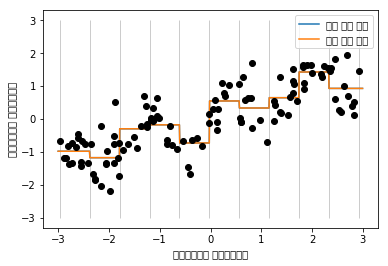

In [58]:
line_binned = kb.transform(line)

reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='구간 선형 회귀')

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='구간 결정 트리')
plt.plot(X[:, 0], y, 'o', c='k')
plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=.2)
plt.legend(loc="best")
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")

#### 4.5 상호작용과 다항식

In [62]:
X_combined = np.hstack([X, X_binned])
X_combined.shape

(120, 11)

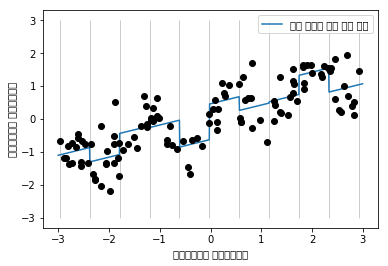

In [61]:
reg = LinearRegression().fit(X_combined, y)

line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label='원본 특성을 더한 선형 회귀')

plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=.2)
plt.legend(loc="best")
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.plot(X[:, 0], y, 'o', c='k')

In [64]:
X_product = np.hstack([X_binned, X * X_binned])
X_product.shape

(120, 20)

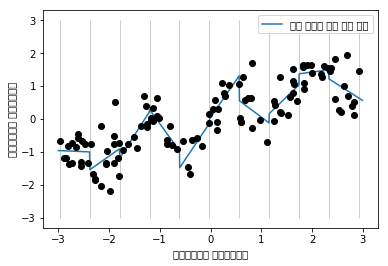

In [65]:
reg = LinearRegression().fit(X_product, y)

line_product = np.hstack([line_binned, line * line_binned])
plt.plot(line, reg.predict(line_product), label='원본 특성을 곱한 선형 회귀')

plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=.2)

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.legend(loc="best")

In [66]:
from sklearn.preprocessing import PolynomialFeatures

# x ** 10까지 고차항을 추가합니다
# 기본값인 "include_bias=True"는 절편에 해당하는 1인 특성을 추가합니다
poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)

In [68]:
X_poly.shape

(120, 10)

In [70]:
X[:5]

array([[-0.75275929],
       [ 2.70428584],
       [ 1.39196365],
       [ 0.59195091],
       [-2.06388816]])

In [71]:
X_poly[:5]

array([[-7.52759287e-01,  5.66646544e-01, -4.26548448e-01,
         3.21088306e-01, -2.41702204e-01,  1.81943579e-01,
        -1.36959719e-01,  1.03097700e-01, -7.76077513e-02,
         5.84199555e-02],
       [ 2.70428584e+00,  7.31316190e+00,  1.97768801e+01,
         5.34823369e+01,  1.44631526e+02,  3.91124988e+02,
         1.05771377e+03,  2.86036036e+03,  7.73523202e+03,
         2.09182784e+04],
       [ 1.39196365e+00,  1.93756281e+00,  2.69701700e+00,
         3.75414962e+00,  5.22563982e+00,  7.27390068e+00,
         1.01250053e+01,  1.40936394e+01,  1.96178338e+01,
         2.73073115e+01],
       [ 5.91950905e-01,  3.50405874e-01,  2.07423074e-01,
         1.22784277e-01,  7.26822637e-02,  4.30243318e-02,
         2.54682921e-02,  1.50759786e-02,  8.92423917e-03,
         5.28271146e-03],
       [-2.06388816e+00,  4.25963433e+00, -8.79140884e+00,
         1.81444846e+01, -3.74481869e+01,  7.72888694e+01,
        -1.59515582e+02,  3.29222321e+02, -6.79478050e+02,
         1.

In [72]:
poly.get_feature_names()

['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']